In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
from numpy import array
from random import random
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


from sklearn.metrics import balanced_accuracy_score



import csv
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import time

from sklearn.metrics import classification_report


from sklearn.utils import shuffle


In [3]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [4]:
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add



In [5]:
ml_list={"DT":DecisionTreeClassifier()}

In [6]:
def target_name(name):
    df = pd.read_csv(name,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    return target_names

## Calculation of evaluations

In [7]:
def score(altime,train_time,test_time,predict,y_test,class_based_results,i,cv,dname,ii):
    precision=[]
    recall=[]
    f1=[]
    accuracy=[]
    total_time=[]
    kappa=[]
    accuracy_b=[]
    
    rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
    pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
    f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")        
    report = classification_report(y_test, predict, target_names=target_names,output_dict=True)
    cr = pd.DataFrame(report).transpose()
    if class_based_results.empty:
        class_based_results =cr
    else:
        class_based_results = class_based_results.add(cr, fill_value=0)
    precision.append(float(pr))
    recall.append(float(rc))
    f1.append(float(f_1))
    accuracy_b.append(balanced_accuracy_score( y_test,predict))
    accuracy.append(accuracy_score(y_test, predict))
    #clf.score(X_test, y_test))
    #print(balanced_accuracy_score( y_test,predict))
    #t_time.append(float((time.time()-second)) )
    kappa.append(round(float(sklearn.metrics.cohen_kappa_score(y_test, predict, 
    labels=None, weights=None, sample_weight=None)),15))
    print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-8s %-5s %-8s %-8s%-8s%-8s' % (dname,i,cv,ii[0:6],str(round(np.mean(accuracy),2)),str(round(np.mean(accuracy_b),2)),
        str(round(np.mean(precision),2)), str(round(np.mean(recall),2)),str(round(np.mean(f1),4)), 
        str(round(np.mean(kappa),2)),str(round(np.mean(train_time),2)),str(round(np.mean(test_time),2)),str(round(np.mean(test_time)+np.mean(train_time),2)),str(round(np.mean(altime),2))))
    lines=(str(dname)+","+str(i)+","+str(cv)+","+str(ii)+","+str(round(np.mean(accuracy),15))+","+str(round(np.mean(accuracy_b),15))+","+str(round(np.mean(precision),15))+","+ str(round(np.mean(recall),15))+","+str(round(np.mean(f1),15))+","+str(round(np.mean(kappa),15))+","+str(round(np.mean(train_time),15))+","+str(round(np.mean(test_time),15))+","+str(altime)+"\n")
    return lines,class_based_results

# isolated training and test data

In [8]:
def ML_isolated(loop1,loop2,output_csv,cols,step,x,dname):
    graph_on_off=False
    #graph_on_off=False
    print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-8s %-5s %-8s %-8s%-8s%-8s'%
               ("Dataset","T","CV","ML alg","Acc","b_Acc","Prec", "Rec" , "F1", "kap" ,"tra-T","test-T","total","alg-time"))
    ths = open(output_csv, "w")
    ths.write("Dataset,T,CV,ML algorithm,Acc,b_Acc,Precision, Recall , F1-score, kappa ,tra-Time,test-Time,Alg-Time\n")
    repetition=10
    fold=1

    from sklearn.metrics import balanced_accuracy_score
    from sklearn.preprocessing import Normalizer
    
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        for i in range(repetition):



            #TRAIN
            df = pd.read_csv(loop1,usecols=cols)
            #m_train=df["MAC"]
            #del df["MAC"]
            X_train =df[df.columns[0:-1]]
            X_train=np.array(X_train)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y_train=df[df.columns[-1]].cat.codes  

            #TEST
            df = pd.read_csv(loop2,usecols=cols)
            df = shuffle(df)
            #m_test=df["MAC"]
            #del df["MAC"]
            X_test =df[df.columns[0:-1]]
            X_test=np.array(X_test)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y_test=df[df.columns[-1]].cat.codes



            #dname=loop1  [10:-17]  
            results_y=[]
            cv+=1
            results_y.append(y_test)


            precision=[]
            recall=[]
            f1=[]
            accuracy=[]
            train_time=[]
            test_time=[]
            total_time=[]
            kappa=[]
            accuracy_b=[]

                #machine learning algorithm is applied in this section
            clf = ml_list[ii]#choose algorithm from ml_list dictionary
            second=time.time()
            clf.fit(X_train, y_train)
            train_time.append(float((time.time()-second)) )
            second=time.time()
            predict =clf.predict(X_test)
            test_time.append(float((time.time()-second)) )

            altime=-0
                
            lines,class_based_results=score(altime,train_time,test_time,predict,y_test,class_based_results,i,cv,dname,ii)

            
    
            df_cm = pd.DataFrame(confusion_matrix(y_test, predict))
            results_y.append(predict)
            if cm.empty:
                cm =df_cm
            else:
                cm = cm.add(df_cm, fill_value=0)

            ths.write (lines)
            
        if graph_on_off:
            print(class_based_results/(repetition*fold)) 
            graph_name=output_csv[:-4]+".pdf"     
            plt.figure(figsize = (20,14))
            sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names,fmt='', annot=True)
            plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)
            plt.show()
            #print(cm)
            print("\n\n\n") 



    ths.close()  
    print()

In [12]:
def feature_names():
    features=['pck_size', 'Ether_type', 'LLC_dsap', 'LLC_ssap', 'LLC_ctrl',
           'EAPOL_version', 'EAPOL_type', 'EAPOL_len', 'IP_version', 'IP_ihl',
           'IP_tos', 'IP_len', 'IP_flags', 'IP_Z', 'IP_MF', 
           'IP_DF', 'IP_frag', 'IP_ttl', 'IP_proto', 'IP_options', 
           'ICMP_type', 'ICMP_code',  'ICMP_seq',
           'ICMP_ts_ori', 'ICMP_ts_rx', 'ICMP_ts_tx', 'ICMP_ptr', 'ICMP_reserved',
           'ICMP_length', 'ICMP_nexthopmtu', 'ICMP_unused',
            'TCP_dataofs', 'TCP_reserved', 'TCP_flags',
           'TCP_FIN', 'TCP_SYN', 'TCP_RST', 'TCP_PSH', 'TCP_ACK', 'TCP_URG',
           'TCP_ECE', 'TCP_CWR', 'TCP_window',  'TCP_urgptr',
           'TCP_options', 'UDP_len', 'DHCP_options', 'BOOTP_op',
           'BOOTP_htype', 'BOOTP_hlen', 'BOOTP_hops',  'BOOTP_secs',
           'BOOTP_flags', 'BOOTP_sname', 'BOOTP_file', 'BOOTP_options',
           'DNS_length',  'DNS_qr', 'DNS_opcode', 'DNS_aa', 'DNS_tc',
           'DNS_rd', 'DNS_ra', 'DNS_z', 'DNS_ad', 'DNS_cd', 'DNS_rcode',
           'DNS_qdcount', 'DNS_ancount', 'DNS_nscount', 'DNS_arcount','entropy', 'Protocol',
           "Label"]
    iden=[ 'IP_id','ICMP_chksum', 'ICMP_id','TCP_seq', 'TCP_ack','TCP_chksum', 'UDP_chksum','DNS_id','BOOTP_xid', 'sport','dport','TCP_sport', 'TCP_dport', 'UDP_sport', 'UDP_dport','sport_class', 'dport_class']
    return iden,features


    

In [13]:
folder("isolated")

In [14]:
test='Aalto_test_IoTDevID.csv'
train='Aalto_train_IoTDevID.csv'

iden,features=feature_names()

ml_list={"DT":DecisionTreeClassifier()}
step=1
flexible=0
i="0 empty"
output_csv="./isolated/DT_"+i+".csv"
target_names=target_name(test)
ML_isolated(train,test,output_csv,features,step,flexible,i)   


for ii,i in enumerate(iden):
    temp=[]
    temp=features
    temp.insert(0,i)
    output_csv="./isolated/DT_"+i+".csv"
    target_names=target_name(test)
    ML_isolated(train,test,output_csv,temp,step,flexible,i)   
    temp.remove(i)
i="z all"
output_csv="./isolated/DT_"+i+".csv"
target_names=target_name(test)
ML_isolated(train,test,output_csv,iden+features,step,flexible,i)   



Dataset         T   CV  ML alg  Acc   b_Acc Prec  Rec   F1       kap   tra-T    test-T  total   alg-time
0 empty         0   1   DT      0.67  0.66  0.7   0.66  0.6742   0.64  0.28     0.01    0.29    0.0     
0 empty         1   2   DT      0.67  0.66  0.7   0.66  0.6735   0.64  0.27     0.01    0.28    0.0     
0 empty         2   3   DT      0.67  0.66  0.7   0.66  0.6721   0.64  0.26     0.0     0.26    0.0     
0 empty         3   4   DT      0.67  0.66  0.7   0.66  0.6723   0.64  0.26     0.02    0.28    0.0     
0 empty         4   5   DT      0.67  0.66  0.7   0.66  0.6723   0.64  0.26     0.0     0.26    0.0     
0 empty         5   6   DT      0.67  0.66  0.7   0.66  0.6738   0.64  0.27     0.01    0.28    0.0     
0 empty         6   7   DT      0.67  0.66  0.7   0.66  0.6724   0.64  0.27     0.02    0.29    0.0     
0 empty         7   8   DT      0.67  0.66  0.7   0.66  0.6738   0.64  0.25     0.01    0.26    0.0     
0 empty         8   9   DT      0.67  0.66  0.7   0.66 

UDP_chksum      0   1   DT      0.68  0.67  0.71  0.67  0.6816   0.65  0.3      0.02    0.32    0.0     
UDP_chksum      1   2   DT      0.68  0.67  0.7   0.67  0.6807   0.65  0.31     0.01    0.32    0.0     
UDP_chksum      2   3   DT      0.68  0.67  0.71  0.67  0.6816   0.65  0.32     0.02    0.33    0.0     
UDP_chksum      3   4   DT      0.68  0.67  0.71  0.67  0.6821   0.65  0.29     0.01    0.3     0.0     
UDP_chksum      4   5   DT      0.68  0.67  0.7   0.67  0.6803   0.65  0.32     0.0     0.32    0.0     
UDP_chksum      5   6   DT      0.68  0.67  0.7   0.67  0.6801   0.65  0.33     0.02    0.35    0.0     
UDP_chksum      6   7   DT      0.68  0.67  0.71  0.67  0.6816   0.65  0.36     0.01    0.37    0.0     
UDP_chksum      7   8   DT      0.68  0.67  0.7   0.67  0.6797   0.65  0.38     0.01    0.39    0.0     
UDP_chksum      8   9   DT      0.68  0.67  0.7   0.67  0.6798   0.65  0.34     0.02    0.35    0.0     
UDP_chksum      9   10  DT      0.68  0.67  0.7   0.67 

UDP_sport       1   2   DT      0.68  0.67  0.71  0.67  0.6805   0.65  0.31     0.01    0.33    0.0     
UDP_sport       2   3   DT      0.68  0.67  0.7   0.67  0.6789   0.65  0.38     0.01    0.39    0.0     
UDP_sport       3   4   DT      0.68  0.67  0.7   0.67  0.6782   0.65  0.34     0.01    0.35    0.0     
UDP_sport       4   5   DT      0.68  0.67  0.71  0.67  0.6794   0.65  0.29     0.0     0.29    0.0     
UDP_sport       5   6   DT      0.68  0.67  0.7   0.67  0.6784   0.65  0.3      0.01    0.31    0.0     
UDP_sport       6   7   DT      0.68  0.67  0.7   0.67  0.6792   0.65  0.3      0.01    0.31    0.0     
UDP_sport       7   8   DT      0.68  0.67  0.71  0.67  0.6792   0.65  0.28     0.02    0.29    0.0     
UDP_sport       8   9   DT      0.68  0.67  0.71  0.67  0.6815   0.65  0.29     0.01    0.31    0.0     
UDP_sport       9   10  DT      0.68  0.67  0.71  0.67  0.6795   0.65  0.28     0.01    0.29    0.0     

Dataset         T   CV  ML alg  Acc   b_Acc Prec  Rec 

# Crossvalidated data
### to equalize the size by making 2 times 5 folds to strengthen comparability

In [15]:
folder("crossval")


In [16]:
test='Aalto_test_IoTDevID.csv'
train='Aalto_train_IoTDevID.csv'

In [17]:
df1 = pd.read_csv(test)
df2 = pd.read_csv(train)
frames = [df1, df2]
df = pd.concat(frames)
df.to_csv('Temp.csv', index=False)

In [18]:
def ML_CV(loop1,loop2,output_csv,cols,step,x,dname):
    fold=5
    ths = open(output_csv, "w")
    ths.write("Dataset,T,CV,ML_algorithm,Acc,b_Acc,Precision, Recall , F1-score, kappa ,tra-Time,test-Time,total-Time,Al-Time\n")
    repetition=2


    from sklearn.metrics import balanced_accuracy_score
    from sklearn.preprocessing import Normalizer
    print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-5s %-5s %-8s %-8s%-8s%-8s'%
               ("Dataset","T","CV","ML_alg","Acc","b_Acc","Prec", "Rec" , "F1", "kap" ,"tra-T","test-T","total","al-time"))

    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        for i in range(repetition):
            rnd = random()
            kfold = KFold(fold, True, int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            #del df["MAC"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            #scaler = Normalizer().fit(X)
            #X = scaler.transform(X)
            # summarize transformed data
            #dname=loop1[7:-4]
            X.shape
            for train_index, test_index in kfold.split(X):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]  

      


                #dname=loop1  [6:-13]  
                results_y=[]
                cv+=1
                results_y.append(y_test)


                precision=[]
                recall=[]
                f1=[]
                accuracy=[]
                train_time=[]
                test_time=[]
                total_time=[]
                kappa=[]
                accuracy_b=[]

                    #machine learning algorithm is applied in this section
                clf = ml_list[ii]#choose algorithm from ml_list dictionary
                second=time.time()
                clf.fit(X_train, y_train)
                train_time.append(float((time.time()-second)) )
                second=time.time()
                predict =clf.predict(X_test)
                test_time.append(float((time.time()-second)) )
    
                altime=0
                lines,class_based_results=score(altime,train_time,test_time,predict,y_test,class_based_results,i,cv,dname,ii)

                ths.write (lines)
    print("")






    ths.close()  

In [19]:
iden

['IP_id',
 'ICMP_chksum',
 'ICMP_id',
 'TCP_seq',
 'TCP_ack',
 'TCP_chksum',
 'UDP_chksum',
 'DNS_id',
 'BOOTP_xid',
 'sport',
 'dport',
 'TCP_sport',
 'TCP_dport',
 'UDP_sport',
 'UDP_dport',
 'sport_class',
 'dport_class']

In [20]:
test=''
train='Temp.csv'

iden,features=feature_names()

ml_list={"DT":DecisionTreeClassifier()}
step=1
flexible=0
i="0 empty"
output_csv="./crossval/DT_"+i+".csv"
target_names=target_name(train)
ML_CV(train,test,output_csv,features,step,flexible,i)   


for ii,i in enumerate(iden):
    temp=[]
    temp=features
    temp.insert(0,i)
    output_csv="./crossval/DT_"+i+".csv"
    target_names=target_name(train)
    ML_CV(train,test,output_csv,temp,step,flexible,i)   
    temp.remove(i)
i="z all"
output_csv="./crossval/DT_"+i+".csv"
target_names=target_name(train)
ML_CV(train,test,output_csv,iden+features,step,flexible,i)   



Dataset         T   CV  ML_alg  Acc   b_Acc Prec  Rec   F1    kap   tra-T    test-T  total   al-time 
0 empty         0   1   DT      0.68  0.67  0.71  0.67  0.6809   0.65  0.49     0.01    0.5     0.0     
0 empty         0   2   DT      0.69  0.67  0.72  0.67  0.6862   0.66  0.48     0.02    0.5     0.0     
0 empty         0   3   DT      0.69  0.68  0.72  0.68  0.69     0.66  0.49     0.0     0.49    0.0     
0 empty         0   4   DT      0.68  0.67  0.7   0.67  0.6784   0.65  0.46     0.0     0.46    0.0     
0 empty         0   5   DT      0.68  0.68  0.71  0.68  0.6859   0.65  0.5      0.0     0.5     0.0     
0 empty         1   1   DT      0.68  0.68  0.71  0.68  0.6886   0.65  0.48     0.01    0.49    0.0     
0 empty         1   2   DT      0.68  0.67  0.72  0.67  0.6828   0.65  0.51     0.01    0.52    0.0     
0 empty         1   3   DT      0.69  0.67  0.72  0.67  0.6884   0.66  0.45     0.01    0.46    0.0     
0 empty         1   4   DT      0.69  0.67  0.72  0.67  0.

UDP_chksum      0   2   DT      0.69  0.68  0.72  0.68  0.6913   0.66  0.45     0.01    0.46    0.0     
UDP_chksum      0   3   DT      0.69  0.7   0.74  0.7   0.7099   0.66  0.44     0.02    0.45    0.0     
UDP_chksum      0   4   DT      0.69  0.68  0.73  0.68  0.6962   0.66  0.46     0.01    0.47    0.0     
UDP_chksum      0   5   DT      0.69  0.67  0.71  0.67  0.6855   0.65  0.47     0.01    0.48    0.0     
UDP_chksum      1   1   DT      0.69  0.69  0.72  0.69  0.6998   0.66  0.45     0.01    0.46    0.0     
UDP_chksum      1   2   DT      0.69  0.69  0.72  0.69  0.7001   0.66  0.44     0.01    0.45    0.0     
UDP_chksum      1   3   DT      0.69  0.67  0.72  0.67  0.6846   0.66  0.46     0.01    0.47    0.0     
UDP_chksum      1   4   DT      0.69  0.69  0.71  0.69  0.6924   0.66  0.46     0.0     0.46    0.0     
UDP_chksum      1   5   DT      0.69  0.68  0.72  0.68  0.6961   0.66  0.44     0.02    0.46    0.0     

Dataset         T   CV  ML_alg  Acc   b_Acc Prec  Rec 

UDP_sport       0   4   DT      0.69  0.69  0.73  0.69  0.7011   0.67  0.47     0.0     0.47    0.0     
UDP_sport       0   5   DT      0.69  0.68  0.72  0.68  0.6952   0.66  0.46     0.03    0.5     0.0     
UDP_sport       1   1   DT      0.69  0.68  0.72  0.68  0.6934   0.66  0.52     0.0     0.52    0.0     
UDP_sport       1   2   DT      0.68  0.69  0.72  0.69  0.6959   0.65  0.5      0.02    0.52    0.0     
UDP_sport       1   3   DT      0.7   0.69  0.73  0.69  0.7053   0.67  0.53     0.02    0.55    0.0     
UDP_sport       1   4   DT      0.69  0.68  0.73  0.68  0.6997   0.66  0.44     0.01    0.45    0.0     
UDP_sport       1   5   DT      0.69  0.68  0.72  0.68  0.6971   0.67  0.44     0.01    0.45    0.0     

Dataset         T   CV  ML_alg  Acc   b_Acc Prec  Rec   F1    kap   tra-T    test-T  total   al-time 
UDP_dport       0   1   DT      0.68  0.68  0.72  0.68  0.6874   0.65  0.43     0.01    0.44    0.0     
UDP_dport       0   2   DT      0.69  0.68  0.72  0.68  0

# Taking the average for comparison and displaying the results on the graph.

In [21]:
import matplotlib.pylab as pylab
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def average_values(name_list):
    flag=1
    for i in name_list:
        df = pd.read_csv(i) 
        col=i[14:-4]
        temp=pd.DataFrame(df.mean(),columns=[col])
        if flag:
            std=temp
            flag=0
        else:
            std[col]=temp[col]
    tt=std.T
    return tt        

## isolated

In [23]:
name_list=find_the_way('./isolated/','.csv')
iso=average_values(name_list)

iso

,T,CV,Acc,b_Acc,Precision,Recall,F1-score,kappa,tra-Time,test-Time,Alg-Time
0 empty,4.5,5.5,0.674611,0.662622,0.700040,0.662622,0.673052,0.642657,0.268405,0.008829,0.0
BOOTP_xid,4.5,5.5,0.673822,0.661524,0.698408,0.661524,0.671846,0.641792,0.452851,0.017103,0.0
DNS_id,4.5,5.5,0.675045,0.662569,0.699705,0.662569,0.672904,0.643143,0.375220,0.014029,0.0
dport,4.5,5.5,0.685686,0.701083,0.723054,0.701083,0.707215,0.655429,0.452105,0.012637,0.0
dport_class,4.5,5.5,0.701761,0.706174,0.732124,0.706174,0.714001,0.672579,0.298845,0.012550,0.0
ICMP_chksum,4.5,5.5,0.674186,0.662417,0.699440,0.662417,0.672692,0.642194,0.366098,0.011219,0.0
ICMP_id,4.5,5.5,0.675432,0.663597,0.700870,0.663597,0.673914,0.643561,0.398979,0.016177,0.0
IP_id,4.5,5.5,0.620895,0.658797,0.672403,0.658797,0.661756,0.584364,0.443460,0.014505,0.0
sport,4.5,5.5,0.715343,0.720831,0.740898,0.720831,0.727089,0.687542,0.495172,0.012850,0.0
sport_class,4.5,5.5,0.674016,0.663345,0.702795,0.663345,0.675186,0.642067,0.278867,0.013183,0.0


## crossvalidated

In [24]:
name_list=find_the_way('./crossval/','.csv')
cv=average_values(name_list)

cv

,T,CV,Acc,b_Acc,Precision,Recall,F1-score,kappa,tra-Time,test-Time,total-Time,Al-Time
0 empty,0.5,3.0,0.683929,0.673034,0.715017,0.673034,0.685257,0.653485,0.479507,0.009119,0.0,NaN
BOOTP_xid,0.5,3.0,0.683962,0.671834,0.715038,0.671834,0.684256,0.653531,0.444984,0.011339,0.0,NaN
DNS_id,0.5,3.0,0.683762,0.673086,0.716190,0.673086,0.685895,0.653318,0.439238,0.007770,0.0,NaN
dport,0.5,3.0,0.718190,0.720222,0.748963,0.720222,0.728874,0.691598,0.541582,0.007386,0.0,NaN
dport_class,0.5,3.0,0.710357,0.710270,0.740981,0.710270,0.719255,0.682562,0.578563,0.009593,0.0,NaN
ICMP_chksum,0.5,3.0,0.684695,0.674018,0.714795,0.674018,0.685575,0.654319,0.510188,0.009843,0.0,NaN
ICMP_id,0.5,3.0,0.685480,0.673248,0.717924,0.673248,0.686282,0.655195,0.416475,0.007841,0.0,NaN
IP_id,0.5,3.0,0.800240,0.793041,0.805265,0.793041,0.797743,0.781532,0.656821,0.010158,0.0,NaN
sport,0.5,3.0,0.861810,0.847299,0.868024,0.847299,0.855166,0.848702,0.519666,0.007278,0.0,NaN
sport_class,0.5,3.0,0.693151,0.681400,0.721054,0.681400,0.694348,0.663645,0.449075,0.010390,0.0,NaN


In [27]:
etiket=['Primary',
 'BOOTP_xid',
 'DNS_id',
 'Dest. ports',
 "dport_class",
 'ICMP_chksum',
 'ICMP_id',
 'IP_id',
 'Source ports',
 "sport_class",
 'TCP_ack',
 'TCP_chksum',
 'TCP_dport',
 'TCP_seq',
 'TCP_sport',
 'UDP_chksum',
 'UDP_dport',
 'UDP_sport',
 'All together']

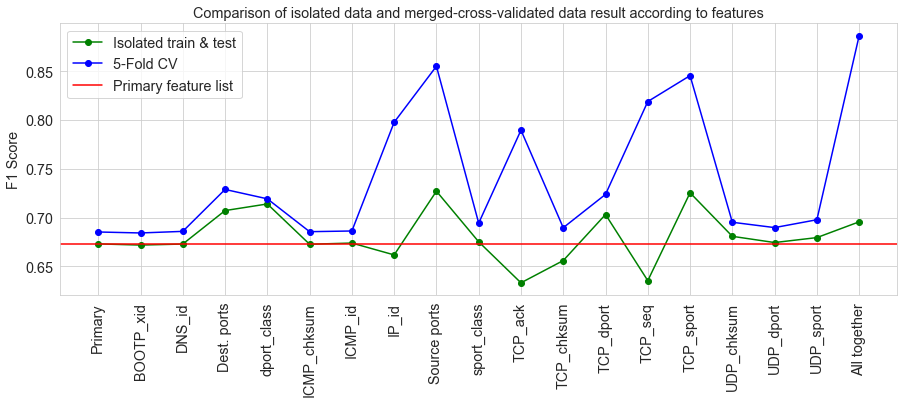

In [29]:
graph_name="Comparison of isolated and CV methods.pdf"
my_xticks=etiket#list(iso.index)
import matplotlib.pylab as pylab



sns.set_style("whitegrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
#plt.figure(figsize=(10,10))
#plt.plot(my_xticks,iso['Acc'], linestyle='--', marker='.', color='b',label= "Separate Train & Test acc")
#plt.plot(my_xticks,cv['Acc'], linestyle='--', marker='.', color='r',label= "10-Fold CV acc")
plt.plot(my_xticks,iso[' F1-score'], linestyle='-', marker='o', color='g',label= "Isolated train & test")
plt.plot(my_xticks,cv[' F1-score'], linestyle='-', marker='o', color='b',label= "5-Fold CV")
plt.axhline(0.673052, color='r',label= "Primary feature list")
plt.title("Comparison of isolated data and merged-cross-validated data result according to features")
plt.legend(numpoints=1)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel("F1 Score")
plt.xticks(rotation=90) 
#plt.ylim([0.69, 0.71]) 
plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)